# Merging Tables

## 1. Import Data

### Import Libraries/Packages

In [6]:
import pandas as pd
import numpy as np

In [7]:
ridership = pd.read_csv('./clean_data/ridership_by_station_2017.csv')
location = pd.read_csv('./clean_data/station_location.csv')
weather = pd.read_csv('./clean_data/weather_2017.csv')

In [46]:
weather['DATETIME'] = pd.to_datetime(weather['DATETIME'], format='%Y-%m-%d %H:%M:%S')
ridership['DATETIME'] = pd.to_datetime(ridership['DATETIME'], format='%Y-%m-%d %H:%M:%S')

In [47]:
ridership.sample()

,STATION,DATETIME,ENTRIES,EXITS
461581,JKSN HT-ROOSVLT,2016-12-24 15:00:00,378.590909,340.454545


In [48]:
location.sample()

,Unnamed: 0,STATION,Stop Name,GTFS Latitude,GTFS Longitude
924,924,LORIMER ST,Lorimer St,40.703869,-73.947408


In [49]:
weather.sample()

,Unnamed: 0,STATION,STATION_NAME,LATITUDE,LONGITUDE,DATETIME,HOURLYPrecip
428,16588,WBAN:14732,LA GUARDIA AIRPORT NY US,40.7792,-73.88,2017-01-11 15:51:00,0.0


## 2. Add Longitude & Latitude

`['EXITS                                                               ']`

In [11]:
df = pd.merge(ridership, location, how='left', left_on='STATION', right_on='STATION')
df = df.drop('Unnamed: 0', axis=1)

In [12]:
df.loc[df['GTFS Latitude'].isnull()].groupby('STATION').count()

,DATETIME,ENTRIES,EXITS,Stop Name,GTFS Latitude,GTFS Longitude
STATION,,,,,,
4AV-9 ST,1236,1236,1236,0,0,0
DEKALB AVE,1229,1229,1229,0,0,0
ORCHARD BEACH,338,338,338,0,0,0
RIT-MANHATTAN,1187,1187,1187,0,0,0
RIT-ROOSEVELT,1228,1228,1228,0,0,0
ST. GEORGE,1243,1243,1243,0,0,0
TOMPKINSVILLE,1226,1226,1226,0,0,0


In [13]:
location['STATION'].unique()

array(['1 AVE', '1 AV', '103 ST', '103 ST-CORONA', '104 ST', '110 ST',
       '110 ST-CATHEDRL', '110 ST-CPN', 'GREENWOOD-111', '111 ST',
       '116 ST', '116 ST-COLUMBIA', '121 ST', '125 ST', '135 ST',
       '137 ST CITY COL', '137 ST-CITY COL', '138 ST-GR CONC',
       '138/GRAND CONC', '138 ST-3 AVE', '14TH STREET', '14 ST-UNION SQ',
       '145 ST', '149 ST-3 AVE', '149 ST-GR CONC', '149/GRAND CONC',
       '15 ST-PROSPECT', '155 ST', '157 ST', '161 ST-YANKEE',
       '161/YANKEE STAD', '163 ST-AMSTERDM', '167 ST', '168 ST',
       '168 ST-BROADWAY', '169 ST', '170 ST', '174 ST', '174-175 ST',
       '174-175 STS', '175 ST', '176 ST', '18 AVE', '18 AV', '18 ST',
       '181 ST', '182-183 ST', '182-183 STS', '183 ST', '190 ST', '191 ST',
       '2 AVE', '2 AV', '20 AVE', '20 AV', '207 ST', '21 ST',
       '21 ST-QNSBRIDGE', '215 ST', '219 ST', '225 ST', '23 ST-5 AVE',
       '23 ST-6 AVE', '23 ST', '231 ST', '233 ST', '238 ST', '25 AVE',
       '25 AV', '25 ST', '28 ST-BROADWAY', 

In [14]:
location.loc[location['STATION'] == 'DEKALB AV']

,Unnamed: 0,STATION,Stop Name,GTFS Latitude,GTFS Longitude
713,713,DEKALB AV,DeKalb Av,40.690635,-73.981824
714,714,DEKALB AV,DeKalb Av,40.703811,-73.918425
715,715,DEKALB AV,DeKalb Av,40.690635,-73.981824
716,716,DEKALB AV,DeKalb Av,40.703811,-73.918425


In [15]:
df.loc[df['STATION'] == '4AV-9 ST', 'GTFS Latitude'] = 40.670272
df.loc[df['STATION'] == '4AV-9 ST', 'GTFS Longitude'] = -73.989779

In [16]:
df.loc[df['STATION'] == 'DEKALB AVE', 'GTFS Latitude'] = 40.690635
df.loc[df['STATION'] == 'DEKALB AVE', 'GTFS Longitude'] = -73.981824

In [19]:
df = df.loc[df['GTFS Latitude'].notnull()]

## 3. Add Weather

Haversine formula for calculating distance with Longitude and Latitude:

In [25]:
from math import cos, asin, sqrt

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

def closest(data, v):
    return min(data, key=lambda p: distance(v['lat'],v['lon'],p['lat'],p['lon']))

In [32]:
weather['STATION'].unique()

array(['WBAN:14732', 'WBAN:94728', 'WBAN:94789'], dtype=object)

In [37]:
weather.sample()

,Unnamed: 0,STATION,STATION_NAME,LATITUDE,LONGITUDE,DATETIME,HOURLYPrecip
4160,33651,WBAN:94728,NY CITY CENTRAL PARK NY US,40.7889,-73.9669,2017-01-04 09:51:00,0.0


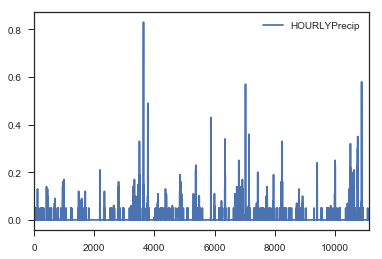

In [38]:
weather.loc[:, ['STATION_NAME', 'DATETIME', 'HOURLYPrecip']].plot()

In [ ]:
import seaborn as sns


# Plot the response with standard error
sns.tsplot(data=weather, time="DATETIME",
           condition="STATION_NAME", value="HOURLYPrecip")

In [ ]:
tempDataList = [{'lat': 39.7612992, 'lon': -86.1519681}, 
                {'lat': 39.762241,  'lon': -86.158436 }, 
                {'lat': 39.7622292, 'lon': -86.1578917}]

v = {'lat': 39.7622290, 'lon': -86.1519750}
print(closest(tempDataList, v))

In [23]:
df.to_csv('./clean_data/ridership_w_location.csv')

,STATION,DATETIME,ENTRIES,EXITS,Stop Name,GTFS Latitude,GTFS Longitude
0,1 AV,2016-12-24 03:00:00,34.100000,48.700000,1 Av,40.730953,-73.981628
1,1 AV,2016-12-24 07:00:00,126.800000,162.800000,1 Av,40.730953,-73.981628
2,1 AV,2016-12-24 11:00:00,212.800000,209.100000,1 Av,40.730953,-73.981628
3,1 AV,2016-12-24 15:00:00,258.200000,275.000000,1 Av,40.730953,-73.981628
4,1 AV,2016-12-24 19:00:00,185.400000,189.500000,1 Av,40.730953,-73.981628
5,1 AV,2016-12-24 23:00:00,78.700000,80.100000,1 Av,40.730953,-73.981628
6,1 AV,2016-12-25 03:00:00,17.800000,29.600000,1 Av,40.730953,-73.981628
7,1 AV,2016-12-25 07:00:00,71.000000,90.300000,1 Av,40.730953,-73.981628
8,1 AV,2016-12-25 11:00:00,146.200000,155.000000,1 Av,40.730953,-73.981628
9,1 AV,2016-12-25 15:00:00,175.600000,211.500000,1 Av,40.730953,-73.981628
